In [79]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [80]:
import numpy as np
import pandas as pd

In [81]:
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [82]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [83]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [84]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [85]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [86]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [87]:
inspector = inspect(engine)
measurement_columns = []

columns = inspector.get_columns('measurement')
for c in columns:
    measurement_columns.append(c['name'])
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [88]:
columns = inspector.get_columns('station')

station_columns = []
columns = inspector.get_columns('station')
for c in columns:
    station_columns.append(c['name'])
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [89]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [90]:
# Latest measurement 



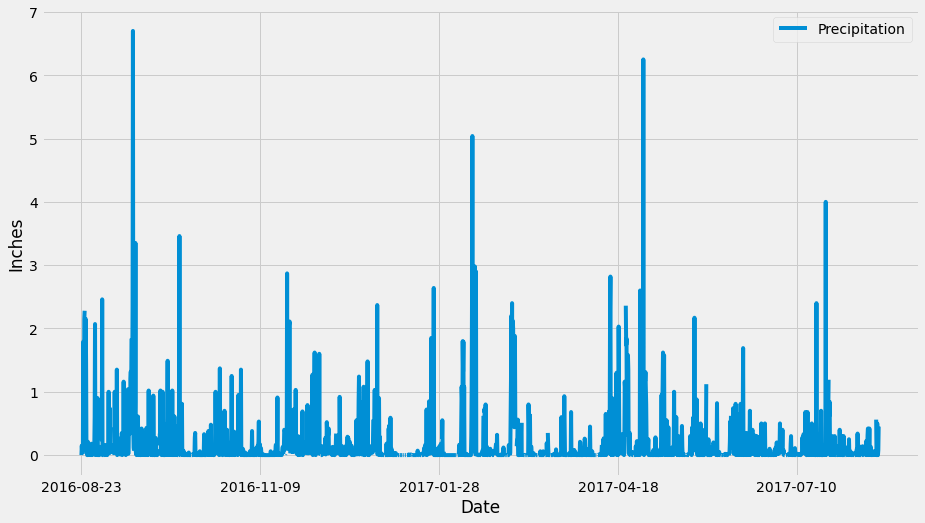

In [91]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
latest_measure = session.query(Measurement).order_by(Measurement.date.desc()).limit(1).all()
last_date_list = latest_measure[0].date.split('-')
last12_start = dt.date(int(last_date_list[0]),int(last_date_list[1]),int(last_date_list[2])) - dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores

sel = [Measurement.date, Measurement.prcp]
last12_measure = session.query(*sel).\
    filter(func.datetime(Measurement.date) >= last12_start).\
    order_by(Measurement.date).all()
last12_measure

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(last12_measure, columns=['date', 'prcp'])
df = df.rename(columns={"prcp": "Precipitation"})
df.dropna()
# Sort the dataframe by date
df.set_index('date', inplace=True)
df = df.sort_index()
df.plot(figsize = (14, 8),use_index=True, legend=True)
# plt.tight_layout()
# plt.ylim(0, 3) 
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()
# Use Pandas Plotting with Matplotlib to plot the data


In [92]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [93]:
# Design a query to show how many stations are available in this dataset?

station_count_query = session.query(func.count(Station.station)).all()
station_count_query

[(9)]

In [94]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
measurement_stn_grp = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
measurement_stn_grp             
        

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [95]:
print(f"Which station has the highest number of observations? {measurement_stn_grp[0][0]}")

Which station has the highest number of observations? USC00519281


In [96]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

tob_measure = session.query(Measurement.station,func.min(Measurement.tobs),\
    func.max(Measurement.tobs),func.avg(Measurement.tobs),\
    func.count(Measurement.station)).\
    filter(Measurement.station == measurement_stn_grp[0][0]).\
    order_by(func.count(Measurement.station).desc()).all()
tob_measure   



[('USC00519281', 54.0, 85.0, 71.66378066378067, 2772)]

In [97]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tob_last12_measure = session.query(Measurement.station,Measurement.date,Measurement.tobs).\
                filter(func.datetime(Measurement.date) > last12_start).\
                filter(Measurement.station ==measurement_stn_grp[0][0]).\
                order_by(Measurement.date).all()
tob_last12_measure

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

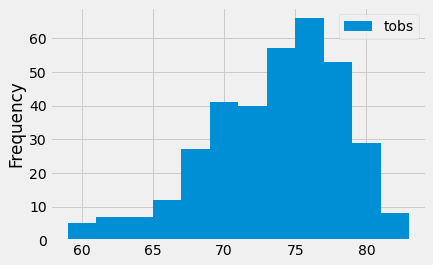

In [98]:
tob_last12_measure_pd = pd.DataFrame(tob_last12_measure)

tob_last12_measure_pd.dropna()
tob_last12_measure_pd.head()
tob_last12_measure_pd.plot(kind='hist',bins=12)

## Bonus Challenge Assignment

In [99]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [100]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temp1 = calc_temps('2016-11-05', '2016-11-15')
temp1

[(63.0, 73.78571428571429, 79.0)]

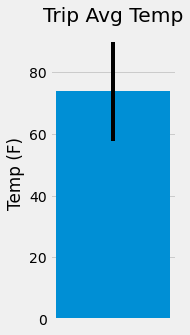

In [101]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerr_temp = temp1[0][2] - temp1[0][0]
plt.figure(figsize=(2,5))
plt.bar(1,trip_temp[0][1],yerr=yerr_temp)
plt.title("Trip Avg Temp")
plt.xticks([])
plt.ylabel("Temp (F)")
plt.show()

In [102]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# set start as one year back date of the prospective trip start date
# set end as one year back date of the prospective trip end date
start = '2016-11-05'
end   = '2016-11-15'

rainfall_station = session.query(Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation).\
                            filter(Measurement.date >= start).filter(Measurement.date <= end).\
                            join(Station,Measurement.station==Station.station).\
                            group_by(Measurement.station).\
                            order_by(func.sum(Measurement.prcp).desc()).all()
rainfall_station


[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]

In [103]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [109]:
# calculate the daily normals for your trip

# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

trip_start_date = '2017-11-05'
trip_end_date   = '2017-11-15'

startD = dt.datetime.strptime(trip_start_date, '%Y-%m-%d')
endD = dt.datetime.strptime(trip_end_date, '%Y-%m-%d')  

trip_dates = pd.date_range(start=startD, end=endD)
trip_dates_formatted = []


# Stip off the year and save a list of %m-%d strings
for d in trip_dates:
    trip_dates_formatted.append(d.strftime("%m-%d"))


# Loop through the list of %m-%d strings and calculate the normals for each date
normal_temp=[]
for i in range(len(trip_dates_formatted)):
    normal_temp.append(daily_normals(trip_dates_formatted[i])[0])
    
normal_temp    

[(64.0, 73.5576923076923, 78.0),
 (66.0, 74.31111111111112, 81.0),
 (63.0, 73.76, 80.0),
 (67.0, 73.75, 81.0),
 (67.0, 73.59615384615384, 81.0),
 (63.0, 72.47916666666667, 79.0),
 (67.0, 74.3913043478261, 80.0),
 (62.0, 72.78, 80.0),
 (61.0, 72.48979591836735, 79.0),
 (68.0, 74.33333333333333, 80.0),
 (65.0, 73.67924528301887, 79.0)]

In [112]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
column_list = ['tmin','tavg','tmax']
normal_df = pd.DataFrame(normal_temp,columns = column_list)
normal_df['date'] = pd.Series(trip_dates).values
normal_df= normal_df.set_index('date')
normal_df

,tmin,tavg,tmax
date,,,
2017-11-05,64.0,73.557692,78.0
2017-11-06,66.0,74.311111,81.0
2017-11-07,63.0,73.760000,80.0
2017-11-08,67.0,73.750000,81.0
2017-11-09,67.0,73.596154,81.0
2017-11-10,63.0,72.479167,79.0
2017-11-11,67.0,74.391304,80.0
2017-11-12,62.0,72.780000,80.0
2017-11-13,61.0,72.489796,79.0


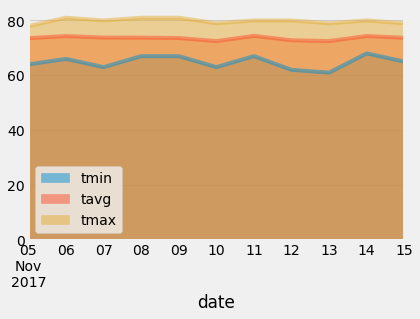

In [118]:
# Plot the daily normals as an area plot with `stacked=False`

normal_df.plot.area(stacked=False)
